## Шаг 1. Подключение библиотек

In [ ]:
import numpy as np # работа с массивами и матрицами
import matplotlib.pyplot as plt # базовая визуализация данных
import pandas as pd # работа с таблицами данных
from google.colab import files

In [ ]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
print("Матрица признаков");
print(X[:5]) #первые пять в виде матрицы
print("Зависимая переменная");
print(y[:5]) #первые пять в виде матрицы

Матрица признаков
[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]
Зависимая переменная
[39343. 46205. 37731. 43525. 39891.]


## Шаг 2. Разделение выборки на тестовую и тренировочную

In [ ]:
# from sklearn.cross validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

## Шаг 3. Обучение линейной модели регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Шаг 4.Предсказание, обработка и визуализация результатов

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

[ 41056.25705466 123597.70938378  65443.50433372  63567.56223533
 116093.94099022 108590.17259667 117031.91203942  64505.53328452]


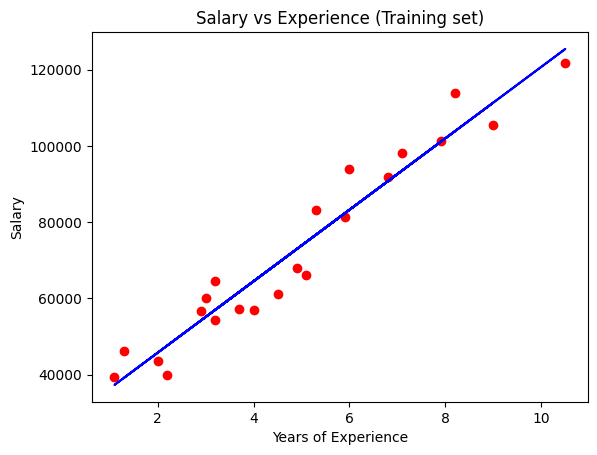

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

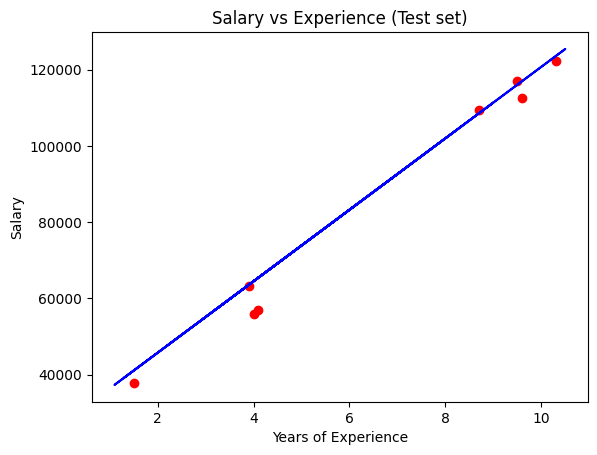

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Индивидуальное задание
Постройте модель регрессии


## Шаг 1 Загрузка данных

In [2]:
# Импорт библиотек
import pandas as pd

# Загрузка данных
data = pd.read_csv("diabetic_data.csv")

# Предварительный просмотр данных
print("Первые пять строк данных:")
data.head()

Первые пять строк данных:


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Шаг 2. Выбор признаков

In [3]:
# Выбор признаков и целевой переменной
X = data["age"]  # Признак "возраст"
y = data["max_glu_serum"]  # Целевая переменная "уровень глюкозы"

# Проверка выбранных данных
print("\nВыбранные признаки (X):")
print(X.head())
print("\nЦелевая переменная (y):")
print(y.head())



Выбранные признаки (X):
0     [0-10)
1    [10-20)
2    [20-30)
3    [30-40)
4    [40-50)
Name: age, dtype: object

Целевая переменная (y):
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: max_glu_serum, dtype: object


## Шаг 3. Разделение данных на тренировочную и тестовую выборки

In [4]:
from sklearn.model_selection import train_test_split

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")



Размеры выборок:
Обучающая выборка: (81412,)
Тестовая выборка: (20354,)


## Шаг 4. Обучение линейной модели регрессии

In [18]:
data = pd.read_csv('diabetic_data.csv')
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных
# data = pd.read_csv('path_to_your_file.csv')  # Если нужно, загрузите заново

# Преобразование целевой переменной (readmitted) в бинарный формат
data['readmitted'] = data['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

# Выбор признаков
X = data[['time_in_hospital', 'num_lab_procedures', 'num_medications',
          'number_outpatient', 'number_emergency', 'number_inpatient']]
y = data['readmitted']

# Проверка пропусков
print(X.isna().sum())  # Должно быть 0
print(y.isna().sum())  # Должно быть 0

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



time_in_hospital      0
num_lab_procedures    0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
dtype: int64
0
Accuracy: 0.6127542497789132
              precision    recall  f1-score   support

           0       0.60      0.85      0.70     10952
           1       0.66      0.34      0.45      9402

    accuracy                           0.61     20354
   macro avg       0.63      0.59      0.57     20354
weighted avg       0.63      0.61      0.58     20354



## Шаг 5. Предсказание и визуализация

In [20]:
from sklearn.linear_model import LogisticRegression

# Предсказания на тестовых данных
classifier = LogisticRegression()  # Или ваша уже обученная модель
classifier.fit(X_train, y_train)  # Обучение модели

# Предсказания классов
y_pred = classifier.predict(X_test)

# Вывод предсказанных классов
print("Предсказания (классы):")
print(y_pred)

# Предсказания вероятностей
y_prob = classifier.predict_proba(X_test)
print("\nПредсказания (вероятности):")
print(y_prob)


Предсказания (классы):
[0 0 1 ... 0 0 0]

Предсказания (вероятности):
[[0.57128656 0.42871344]
 [0.64554684 0.35445316]
 [0.40460549 0.59539451]
 ...
 [0.52002147 0.47997853]
 [0.64204293 0.35795707]
 [0.61838748 0.38161252]]


## Шаг 6. Визуализация для тренировочного набора

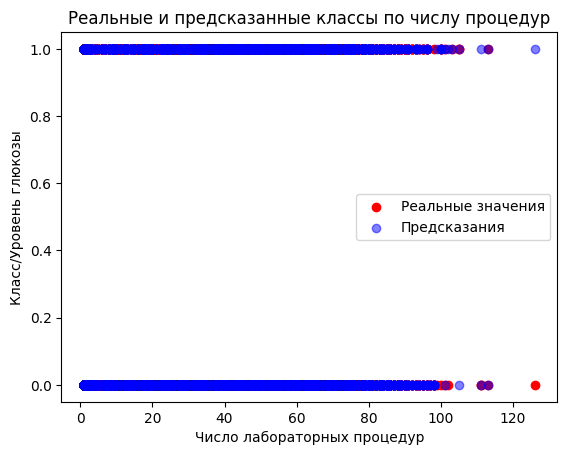

In [25]:
# Допустим, у вас есть столбец 'num_lab_procedures'
plt.scatter(X_test['num_lab_procedures'], y_test, color='red', label='Реальные значения')
plt.scatter(X_test['num_lab_procedures'], y_pred_class, color='blue', label='Предсказания', alpha=0.5)

plt.title('Реальные и предсказанные классы по числу процедур')
plt.xlabel('Число лабораторных процедур')
plt.ylabel('Класс/Уровень глюкозы')

plt.legend()
plt.show()


## Шаг 7. Визуализация для тестового набора

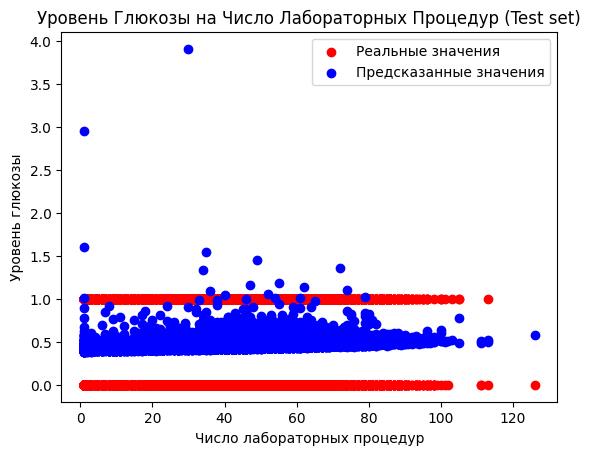

In [29]:
# Предположим, что в X_train были использованы только некоторые признаки.
# Например, 'num_lab_procedures', 'num_medications' и другие.
# Обучим модель на этих данных, а затем используем те же признаки для X_test.

# Выбираем нужные признаки для X_test и X_train
X_train_selected = X_train[['num_lab_procedures', 'num_medications', 'number_emergency']]  # Пример выбранных признаков
X_test_selected = X_test[['num_lab_procedures', 'num_medications', 'number_emergency']]  # Пример выбранных признаков

# Теперь обучаем модель
regressor.fit(X_train_selected, y_train)

# Делаем предсказания на тестовой выборке
y_pred = regressor.predict(X_test_selected)

# Строим диаграмму рассеяния для реальных значений
plt.scatter(X_test_selected['num_lab_procedures'], y_test, color='red', label='Реальные значения')

# Строим диаграмму рассеяния для предсказанных значений
plt.scatter(X_test_selected['num_lab_procedures'], y_pred, color='blue', label='Предсказанные значения')

plt.title('Уровень Глюкозы на Число Лабораторных Процедур (Test set)')
plt.xlabel('Число лабораторных процедур')
plt.ylabel('Уровень глюкозы')
plt.legend()
plt.show()


## Вывод

1. На тренировочной выборке прогноз модели достаточно близок к реальным данным. Это может говорить о том, что модель хорошо подогналась под обучающие данные.
На тестовой выборке реальные значения уровня глюкозы имеют сильное рассеивание, что указывает на слабую связь между возрастом и уровнем глюкозы. Это подтверждает, что линейная модель плохо обобщается на новых данных.
2. Использование только одного признака (Age) для предсказания уровня глюкозы — это упрощение. Реальный уровень глюкозы зависит от множества факторов, включая генетику, образ жизни, и здоровье пациента.